In [1]:
import numpy as np
np.random.seed(2023 - 6 - 14)
import pandas as pd
import matplotlib.pyplot as plt

# ___Estimating the Difference in Population Means with Confidence___
-------------------

In [2]:
nhanes = pd.read_csv("../data/nhanes_2015_2016.csv", usecols = ["RIAGENDR", "BMXBMI"]).dropna(axis = 0)

In [3]:
nhanes.BMXBMI.isna().sum()

0

In [4]:
nhanes = pd.Series(data = nhanes.BMXBMI.values, index = nhanes.RIAGENDR.apply(lambda x: 'M' if x == 1 else 'F'))

In [5]:
# Q: Does the BMI of males differ significantly from the BMI of females?

In [6]:
nhanes.index.unique()

Index(['M', 'F'], dtype='object', name='RIAGENDR')

In [7]:
nhanes

RIAGENDR
M    27.8
M    30.8
M    28.8
F    42.4
F    20.3
     ... 
F    21.5
M    33.8
F    31.0
M    26.0
F    21.4
Length: 5662, dtype: float64

In [8]:
nhanes.groupby(level = 0).mean()

RIAGENDR
F    29.939946
M    28.778072
dtype: float64

In [9]:
# Now we have a sample of 200 people.

males = nhanes.loc['M']
males = males.iloc[np.random.randint(low = 0, high = males.shape[0], size = 1000)]
females = nhanes.loc['F']
females = females.iloc[np.random.randint(low = 0, high = females.shape[0], size = 1000)]

In [10]:
males

RIAGENDR
M    23.2
M    32.9
M    29.5
M    31.5
M    31.1
     ... 
M    27.6
M    27.6
M    23.9
M    20.7
M    26.3
Length: 1000, dtype: float64

In [11]:
females

RIAGENDR
F    21.1
F    29.1
F    30.5
F    37.9
F    35.9
     ... 
F    41.1
F    22.8
F    28.1
F    34.0
F    35.1
Length: 1000, dtype: float64

In [13]:
pop_mean = nhanes.groupby(level = 0).mean()
pop_mean

RIAGENDR
F    29.939946
M    28.778072
dtype: float64

In [14]:
males.describe()

count    1000.000000
mean       29.080600
std         6.376659
min        17.700000
25%        24.800000
50%        27.900000
75%        32.000000
max        58.000000
dtype: float64

In [15]:
females.describe()

count    1000.000000
mean       30.189100
std         7.888742
min        15.500000
25%        24.200000
50%        29.100000
75%        34.300000
max        64.500000
dtype: float64

In [16]:
# To start out, we'll take the sample means as our best estimates.
# Sample mean will change from sample to sample.

# The difference in the BMIs of males and females will vary from sample to sample.
# And this will vary around the true population difference.

In [17]:
# If both populations are approximately normal or if the samples are large enough,
# The distribution of our estimated parameter (difference in sample means) is going to be approximately normal as well.

In [18]:
# Standard error is the statistic that tells us how far away our estimated statistic is from the population statistic.

# ___$S.E_{\mu} = \frac{\sigma}{\sqrt{n}}$___
# ___$Estimated~S.E_{\mu} = \frac{S}{\sqrt{n}}$___

# ___$S.E_{\mu_d} = \frac{\sigma_1}{\sqrt{n_1}} - \frac{\sigma_2}{\sqrt{n_2}}$___

In [19]:
# Since we cannot know the population's standard deviation for males and females,
# we'd use the sample's standard deviation for males asnd females.

# ___$Estimated~S.E_{\mu_d} = \frac{S_1}{\sqrt{n_1}} - \frac{S_2}{\sqrt{n_2}}$___

In [20]:
# Confidence interval = best estimate +- margin of error
# margin of error = multiplier * standard error.

# The multiplier we used for sample mean is t value.

# say that our sample means are x_bar and y_bar, our best estimate is x_bar - y_bar

In [21]:
males.isna().sum(), females.isna().sum()

(0, 0)

In [22]:
male_bmi_sample = males.mean()
female_bmi_sample = females.mean()

male_bmi_sample, female_bmi_sample

(29.080599999999997, 30.1891)

In [23]:
pop_mean

RIAGENDR
F    29.939946
M    28.778072
dtype: float64

In [65]:
stderr_male = males.std() / np.sqrt(males.size)
stderr_female = females.std() / np.sqrt(females.size)

stderr_male, stderr_female

(0.2016476764691957, 0.2494639120863646)

In [25]:
males.size, females.size

(1000, 1000)

In [80]:
best_est = (males.mean() - females.mean())
best_est

-1.108500000000003

## ___Confidence Interval Approaches:___
----------------------

In [ ]:
# 1) Pooled approach =>
# This assumes that the variances of our sampling POPULATIONS equal if they are close enough.
# i.e if the variances of males' BMI and females BMI are close enough, we'd assume them to be equal.
# Since we cannot measure the variances of populations, we'd evaluate this condition using sample variances.

# 2) Unpooled approach =>
# This does not assume that the variances of the two POPULATIONS are equal, when they are close enough.

## ___Unpooled Confidence Intervals:___

# ___$= (\bar{x}_m - \bar{x}_f) \pm MoE$___

# ___$= (\bar{x}_m - \bar{x}_f) \pm (t^* \cdot Std.Err)$___
# ___$= (\bar{x}_m - \bar{x}_f) \pm t^* \cdot (\frac{\sigma_m}{\sqrt{n_m}} + \frac{\sigma_f}{\sqrt{n_f}})$___

# ___$= (\bar{x}_m - \bar{x}_f) \pm (t^* \cdot Est.Std.Err)$___
# ___$= (\bar{x}_m - \bar{x}_f) \pm t^* \cdot (\frac{S_m}{\sqrt{n_m}} + \frac{S_f}{\sqrt{n_f}})$___

In [ ]:
# We'd use the t value for 95% confidence level (5% significance)
# Degrees of freedom for the t multiplier can be found using Welch's approximation.
# If we had just one sample, our df will be n - 1.
# Since we have 2 samples here we cannot simply use the sample size - 1 approach.
# Even if the sizes of the 2 samples are same :(

# Or a rather less accurate alternative is to use the minimum (n - 1) value.

In [30]:
# We'd use the smallest sample size - 1 as n

min(males.size, females.size) - 1

999

## ___Pooled Confidence Intervals:___

# ___$= (\bar{x}_m - \bar{x}_f) \pm MoE$___
# ___$= (\bar{x}_m - \bar{x}_f) \pm (t^* \cdot Std.Err)$___
# ___$= (\bar{x}_m - \bar{x}_f) \pm t^* \cdot (\sqrt{\frac{\sigma_m^2(n_m - 1) + \sigma_f^2(n_f - 1)}{n_m + n_f - 2}} \cdot \sqrt{\frac{1}{n_m} + \frac{1}{n_f}})$___
# ___$= (\bar{x}_m - \bar{x}_f) \pm (t^* \cdot Est.Std.Err)$___
# ___$= (\bar{x}_m - \bar{x}_f) \pm t^* \cdot (\sqrt{\frac{S_m^2(n_m - 1) + S_f^2(n_f - 1)}{n_m + n_f - 2}} \cdot \sqrt{\frac{1}{n_m} + \frac{1}{n_f}})$___

In [ ]:
# For the pooled approach, degrees of freedom is simply = sample_size_1 + sample_size_2 - 2
# This is valid only if we could assume the POPULATION variances are equal. (inferred through sample variances).

## ___Evaluating the conditions___
-------------

In [27]:
# 1) Simple random samples.

In [28]:
# 2) 2 samples are independent of one another.

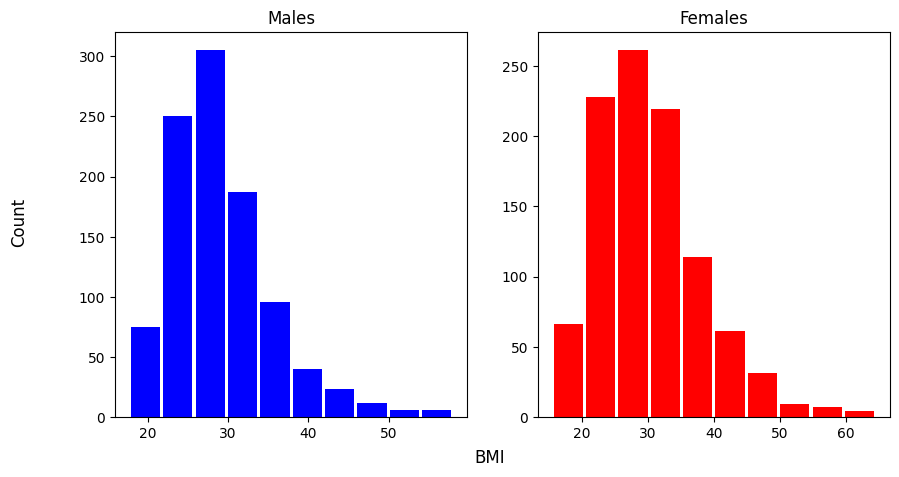

In [29]:
# 3) Normality assumption.

fig, (axes_l, axes_r) = plt.subplots(ncols = 2)
fig.set_size_inches(10, 5)

axes_l.hist(males, rwidth = 0.9, color = "blue")
axes_l.set_title("Males")

axes_r.hist(females, rwidth = 0.9, color = "red")
axes_r.set_title("Females")

fig.supylabel("Count")
fig.supxlabel("BMI")
plt.show()

In [62]:
# Both distributions appear to be right skewed.

In [48]:
males.max(), females.max()

(58.0, 64.5)

In [59]:
np.quantile(males, q = np.arange(0, 1.01, step = 0.05))

array([17.7  , 20.8  , 22.29 , 23.285, 24.1  , 24.8  , 25.47 , 26.1  ,
       26.6  , 27.2  , 27.9  , 28.6  , 29.4  , 30.   , 31.   , 32.   ,
       33.5  , 34.7  , 36.9  , 41.31 , 58.   ])

In [54]:
normal_quantiles = np.quantile(np.random.normal(size  = 1000), q = np.arange(0, 1.01, step = 0.05))
m_quantiles = np.quantile(males, q = np.arange(0, 1.01, step = 0.05))
f_quantiles = np.quantile(females, q = np.arange(0, 1.01, step = 0.05))

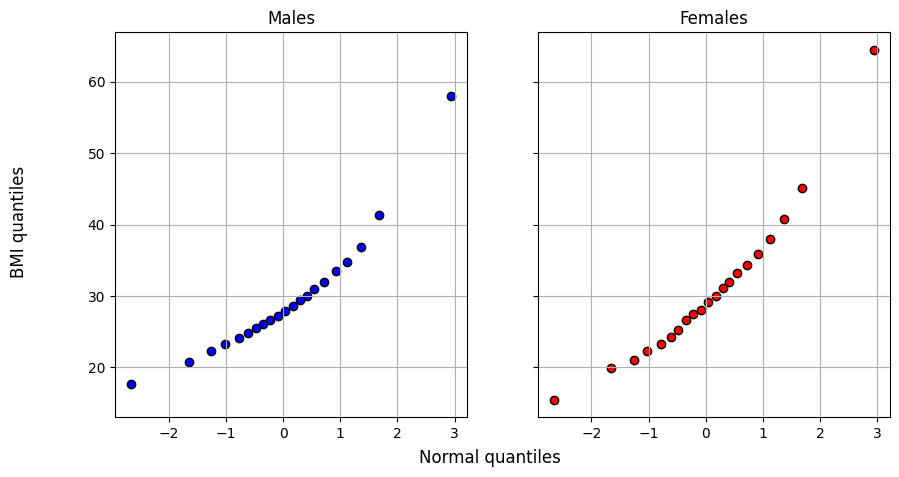

In [61]:
fig, (axes_l, axes_r) = plt.subplots(ncols = 2, sharey = True)
fig.set_size_inches(10, 5)

axes_l.scatter(normal_quantiles, m_quantiles, color = "blue", edgecolor = "black")
axes_l.set_title("Males")
axes_l.grid()
axes_r.scatter(normal_quantiles, f_quantiles, color = "red", edgecolor = "black")
axes_r.set_title("Females")
axes_r.grid()
fig.supylabel("BMI quantiles")
fig.supxlabel("Normal quantiles")
plt.show()

In [ ]:
# If the distribution in our sample is normal (if our sample is a true random sample from a normal population),
# QQ plots will form a more/less straight line.
# i.e when the same set of quantiles from our sample and a normal distribution are plotted against one another, the plot will form a straight line.
# The lines above are a little saggy in the middle but 
# Otherwise they are quite straight-ish.

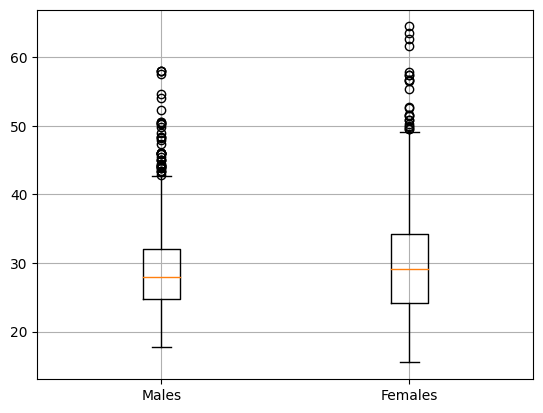

In [89]:
plt.boxplot([males, females], labels = ["Males", "Females"])
plt.grid()
plt.show()

In [42]:
# Since our samples are large enough (we sampled 1000 elements from a population of 5662)
# We'll consider the CLT (central limit theorem) to be valid and proceed anyways.

print(f"{males.size / nhanes.shape[0] * 100:.2f} %")

17.66 %


In [90]:
# Unpooled approach:
# t value @ 95% confidence interval, at (smallest sample size - 1) degrees of freedom is.

# This t start value is an approximation at best.
tstar_unpooled = 1.98

stderr_unpooled = (males.std() / np.sqrt(males.size)) + (females.std() / np.sqrt(females.size))
stderr_unpooled

0.45111158855556033

In [91]:
moerr_unpooled = tstar_unpooled * stderr_unpooled

In [92]:
unpooled_cint = best_est - moerr_unpooled, best_est + moerr_unpooled
unpooled_cint

(-2.0017009453400125, -0.21529905465999344)

In [93]:
pop_mean['M'] - pop_mean['F']

-1.1618735403269653

In [ ]:
# The unpooled confidence interval does not cover 0 in its range.
# But it does cover the true population metric.

In [69]:
# Pooled approach, with a t multiplier 1.98

tstar_pooled = 1.98
stderr_pooled = np.sqrt(((males.var() * (males.size - 1)) + (females.var() * (females.size  - 1))) / (males.size + females.size - 2)) * \
                    np.sqrt((1 / males.size) + (1 / females.size))
moerr_pooled = stderr_pooled * tstar_pooled
moerr_pooled

0.6351265627717599

In [78]:
pooled_cint = best_est - moerr_pooled, best_est + moerr_pooled
pooled_cint

(-1.7436265627717629, -0.473373437228243)

In [76]:
pop_mean['M'] - pop_mean['F']

-1.1618735403269653

In [77]:
# Pooled confidence interval does not include 0 in its range!.
# But it does cover the true population metric!.

In [95]:
moerr_pooled, moerr_unpooled

(0.6351265627717599, 0.8932009453400095)

In [96]:
# Margin of error computed through the unpooled approach is a little large, compared to the one came from pooled approach.